<a href="https://colab.research.google.com/github/DeeeTeeee/Vodafone-Corporation---Classification-ML-Project/blob/master/lp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
path = '/content/Telco-Customer-Churn.csv'
voda = pd.read_csv(path)
voda.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
707,8329-UTMVM,Male,1,No,No,27,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),104.65,2964,No
507,7218-HKQFK,Male,0,Yes,No,2,Yes,No,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,94.20,167.5,Yes
1489,6543-JXSOO,Female,0,Yes,Yes,23,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,Yes,Mailed check,57.75,1282.85,No
3315,9659-ZTWSM,Male,1,Yes,No,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),107.35,7051.95,No
2452,5908-QMGOE,Male,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),74.20,1133.9,Yes


This is a telecommunications company's customer dataset, containing various demographic and usage information for each customer, as well as whether or not they have churned (i.e. cancelled their service). Here are the meanings of the columns:

- customerID: unique identifier for each customer
- gender: customer gender (Male/Female)
- SeniorCitizen: indicates if the customer is a senior citizen or not (1, 0)
- Partner: indicates if the customer has a partner or not (Yes, No)
- Dependents: indicates if the customer has dependents or not (Yes, No)
- tenure: number of months the customer has stayed with the company
- PhoneService: indicates if the customer has a phone service or not (Yes, No)
- MultipleLines: indicates if the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: type of internet service the customer has (DSL, Fiber optic, No)
- OnlineSecurity: indicates if the customer has online security or not (Yes, No, No internet service)
- DeviceProtection: indicates if the customer has device protection or not (Yes, No, No internet service)
- TechSupport: indicates if the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: indicates if the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: indicates if the customer has streaming movies or not (Yes, No, No internet service)
- Contract: type of contract the customer has (Month-to-month, One year, Two year)
- PaperlessBilling: indicates if the customer has paperless billing or not (Yes, No)
- PaymentMethod: payment method used by the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: amount charged to the customer monthly
- TotalCharges: total amount charged to the customer
- Churn: indicates if the customer has churned or not (Yes, No)

## **Questions:**
### 1. What is the most preferred internet service of customers?
### 2. Understand customer demographics with respect to gender?
### 3. Which service is most popular with customers?
### 4. Are customers without dependents likely to have higher charges than those with dependent?


## **Hypothesis**

#### **Null Hypothesis** : Customers on DSL are not likely churn  than those on Fiber internet service
#### **Alternate Hypothesis** : Customers on DSL are likely to churn than those on Fiber internet service

In [ ]:
voda.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
# Checking the data types of all the columns
voda.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# Check the descriptive statistics of numeric variables
voda.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

In [ ]:
import plotly.express as px

churn_counts = voda['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']

fig = px.bar(churn_counts, x='Count', y='Churn', orientation='h', 
             color='Churn', text='Count', title="Count of TARGET Variable per category",
             color_discrete_sequence=['#1f77b4', '#aec7e8'])

fig.update_layout(xaxis_title="Count", yaxis_title="Target Variable",
                  yaxis=dict(categoryorder='total ascending'), 
                  margin=dict(l=100, r=20, t=50, b=50), height=400, showlegend=False)

fig.show()


In [ ]:
100*voda['Churn'].value_counts()/len(voda['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [ ]:
voda['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

 -  Data is highly imbalanced, ratio = 73:27
 
So we analyse the data with other features while taking the target values separately to get some insights

In [ ]:
voda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
import plotly.express as px

missing = pd.DataFrame((voda.isnull().sum())*100/voda.shape[0]).reset_index()
missing.columns = ['Feature', 'Percentage Missing']

fig = px.line(missing, x='Feature', y='Percentage Missing', title="Percentage of Missing Values")
fig.update_layout(xaxis_title="Feature", yaxis_title="Percentage Missing")
fig.show()

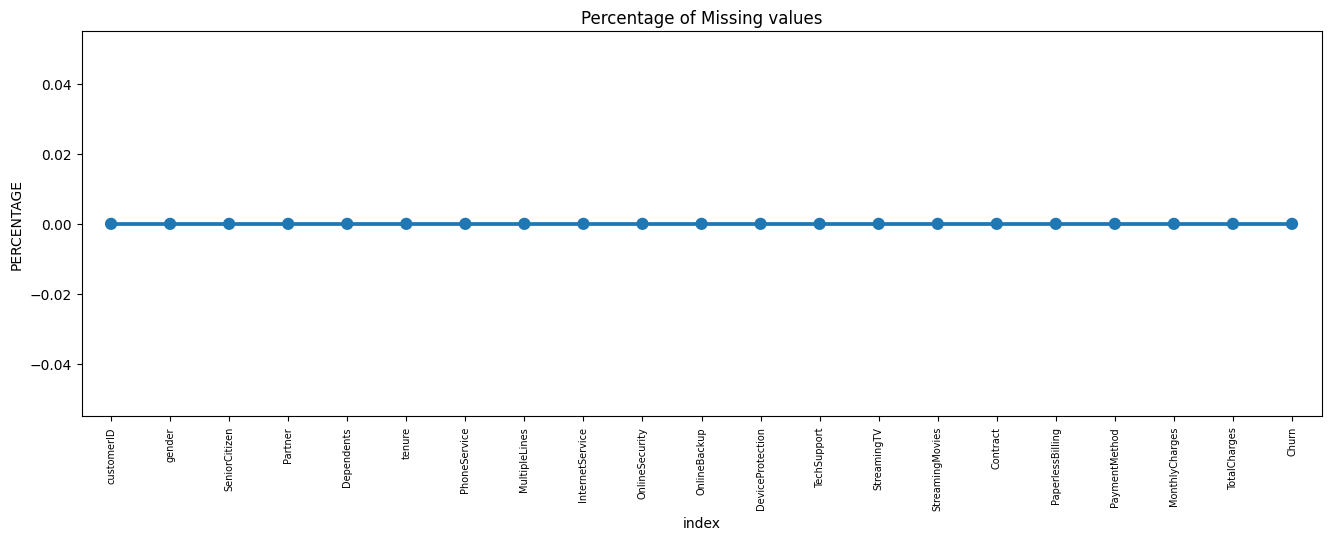

In [ ]:
missing = pd.DataFrame((voda.isnull().sum())*100/voda.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

### Data Cleaning

1. Create a copy of base data for manupulation & processing

In [ ]:
data = voda.copy()

2. Total Charges should be numeric amount. Let's convert it to numerical data type

In [ ]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

3. As we can see there are 11 missing values in TotalCharges column. Let's check these records

In [ ]:
data.loc[data ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


4. Missing Value Treatement

Since the % of these records compared to total dataset is very low ie 0.15%,we however have chosen to fill the cells with 0s.

In [ ]:
data['TotalCharges'] = data['TotalCharges'].fillna(0)
#Fillin with 0s


5. Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [ ]:
# Get the max tenure
print(data['tenure'].max()) 

72


In [ ]:
# # Group the tenure in bins of 12 months
# Create new bin labels
labels = ["1-12", "13-24", "25-36", "49-60", "61-72"]

# Group tenure into new bins and update column
data['tenure_group'] = pd.cut(data.tenure, [1, 13, 25, 37, 61, 73], right=False, labels=labels)

# Count values in new bins and sort by index
tenure_counts = data['tenure_group'].value_counts().sort_index()

# Print sorted counts
print(tenure_counts)


1-12     2175
13-24    1024
25-36     832
49-60    1594
61-72    1407
Name: tenure_group, dtype: int64


6. Remove columns not required for processing

In [ ]:
#drop column customerID and tenure
data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,49-60
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


# Data Exploration
1. Plot distibution of individual predictors by churn

## Univariate Analysis

In [ ]:

for i, predictor in enumerate(data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    fig = px.histogram(data, x=predictor, color='Churn', barmode='group',
                       color_discrete_sequence=['#1f77b4', '#aec7e8'],
                       title=f"Countplot of {predictor} by Churn")
    fig.update_layout(xaxis_title=predictor, yaxis_title="Count",
                      legend_title="Churn", height=400)
    fig.show()


In [ ]:

# # loop through all columns except 'Churn', 'TotalCharges', and 'MonthlyCharges'
# for col in data.columns:
#     if col not in ['Churn', 'TotalCharges', 'MonthlyCharges']:
#         # create a bar chart with counts of each category and color by churn
#         fig = px.histogram(data, x=col, color='Churn', barmode='group', title=col)
#         fig.update_layout(
#             xaxis_title=col,
#             yaxis_title='Count',
#             font=dict(size=12),
#             margin=dict(l=50, r=50, t=50, b=50),
#             showlegend=True,
#             legend=dict(title='Churn', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
#         )
#         fig.update_traces(opacity=0.75)
#         fig.show()


2. Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [ ]:
data['Churn'] = np.where(data.Churn == 'Yes',1,0)
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,49-60
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


3. Convert all the categorical variables into dummy variables

In [ ]:
# data_dummies = pd.get_dummies(data)
# data_dummies.head()

9. Relationship between Monthly Charges and Total Charges

##### Senior citizens and the tendecy to the customer churn

Null Hypothesis : Senior citizen does not correlate with the tendency of customer churn.<br>
Alternate Hypothesis : Senior citizen correlate with the tendency of customer churn.

In [ ]:
from scipy.stats import chi2_contingency
Crosstabresults = pd.crosstab(index= voda['SeniorCitizen'], columns = voda['Churn'])
chisqresult  = chi2_contingency(Crosstabresults)

In [ ]:
print('p-value: ', chisqresult[1])

p-value:  1.510066805092378e-36


Insights:<br>
P-value is less than 0.05, which implies that we reject our null hypothesis. Senior citizen correlates with the customer churn.

##### Gender and the tendency to customer churn 

In [ ]:
Crosstabresults1 = pd.crosstab(index= voda['gender'], columns = voda['Churn'])
chisqresult1  = chi2_contingency(Crosstabresults1)

In [ ]:
chisqresult1[1]

0.48657873605618596

Insights:<br>
P-value is greater than 0.05, which implies that we accept our null hypothesis. Senior citizen correlates with the customer churn.

##Questions

### 1. What is the most preferred internet service of customers?


In [ ]:
#Aggregating count of customers over the internet service columns
inter_serv = voda.groupby('InternetService')['customerID'].count().reset_index()
inter_serv.rename(columns={'customerID':'Number'}, inplace =True)
inter_serv

,InternetService,Number
0,DSL,2421
1,Fiber optic,3096
2,No,1526


In [ ]:
import plotly.graph_objs as go

data_inter_serv = inter_serv['Number']
keys = inter_serv['InternetService']
colors = px.colors.qualitative.Set1
explode = [0, 0.09, 0]

fig = go.Figure(data=[go.Pie(labels=keys, values=data_inter_serv, pull=[0.1, 0, 0], 
                             textinfo='label+percent', marker=dict(colors=colors))])
fig.update_layout(title='Customer Internet Preference')
fig.show()


In [ ]:
import plotly.express as px

data_inter_serv = inter_serv['Number']
keys = inter_serv['InternetService']

fig = px.pie(values=data_inter_serv, names=keys, title='Customer Internet Preference', 
             color_discrete_sequence=px.colors.sequential.Blues, 
             labels={'value': 'Number'})

fig.update_traces(textposition='inside', textinfo='percent+label', pull=[0.1, 0.1, 0])

fig.show()


### 2. Understand customer demographics with respect to gender

In [ ]:
#Splitting Data into customer demographic columns
cus_demo = voda.loc[:,'customerID':'Dependents']
cus_demo.rename(columns = {'customerID': 'Number'},inplace = True)
cus_demo

,Number,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [ ]:
#Aggregate number of customers over demographic columns: Senior Citizen, Partner and Dependents
cus_demo1 = cus_demo.groupby(['SeniorCitizen','gender'])['Number'].count().reset_index()
cus_demo2 = cus_demo.groupby(['Partner', 'gender'])['Number'].count().reset_index()
cus_demo3 = cus_demo.groupby(['Dependents', 'gender'])['Number'].count().reset_index()

In [ ]:
import plotly.express as px

fig1 = px.bar(cus_demo1, x='SeniorCitizen', y='Number', color='gender', barmode='group',
              category_orders={'SeniorCitizen': [0, 1]}, color_discrete_sequence=px.colors.qualitative.Pastel1)

fig2 = px.bar(cus_demo2, x='Partner', y='Number', color='gender', barmode='group',
              category_orders={'Partner': ['Yes', 'No']}, color_discrete_sequence=px.colors.qualitative.Pastel1)

fig3 = px.bar(cus_demo3, x='Dependents', y='Number', color='gender', barmode='group',
              category_orders={'Dependents': ['Yes', 'No']}, color_discrete_sequence=px.colors.qualitative.Pastel1)

fig1.update_layout(title='Customer Demographics', xaxis_title='Senior Citizen', yaxis_title='Number')
fig2.update_layout(xaxis_title='Partner', yaxis_title='Number')
fig3.update_layout(xaxis_title='Dependents', yaxis_title='Number')

fig1.show()
fig2.show()
fig3.show()


Insights:
* Majority of  customers are not senior citizens. That is , the client base is largely young people.
* Majority of the customers are not married. 
* Majority of the customers do not have dependents.

### 3. Which service is most popular with customers?

In [ ]:
#slicing vodafone services from the original data
cus_serv = data.loc[:,'PhoneService':'StreamingMovies']

#Aggregating the count over the columns
serv_tally = cus_serv[cus_serv[['PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]=='Yes'].count()

In [ ]:
serv_tally['InternetService'] = inter_serv['Number'].loc[0:1].sum()

In [ ]:
import plotly.graph_objects as go

# Sorting in ascending order
serv_tally.sort_values(ascending=True, inplace=True)

# Creating a horizontal bar chart
fig = go.Figure(go.Bar(
    x=serv_tally.values,
    y=serv_tally.index,
    orientation='h',
    marker_color='blue' # Setting color of the bars to blue
))

fig.update_layout(title='Most Popular Service', xaxis_title='Number of Customers')
fig.show()


### 4. Are customers without dependents likely to have higher charges than those with dependent?

In [ ]:
import plotly.express as px

fig = px.box(data_frame=data, x='Dependents', y='MonthlyCharges', color='Dependents',
             color_discrete_sequence=['#1f77b4', '#ff7f0e'])
fig.update_layout(title='Monthly Charges by Dependents',
                  xaxis_title='Dependents', yaxis_title='Monthly Charges')
fig.show()


In [ ]:
import plotly.express as px

fig = px.box(data_frame=data, x='Dependents', y='TotalCharges', color='Dependents',
             category_orders={'Dependents': ['No', 'Yes']},
             color_discrete_sequence=['#1f77b4', '#aec7e8'])
fig.update_layout(title='Distribution of Total Charges by Dependents Status',
                  xaxis_title='Dependents', yaxis_title='Total Charges')
fig.show()


In [ ]:

fig = px.scatter(data_frame=data_dummies, x='MonthlyCharges', y='TotalCharges', 
                 trendline='ols', color='Churn', title='Monthly Charges vs Total Charges')

fig.update_layout(xaxis_title='Monthly Charges', yaxis_title='Total Charges',
                  margin=dict(l=50, r=50, t=50, b=50), height=400)

fig.show()


NameError: ignored

Total Charges increase as Monthly Charges increase - as expected.

10. Churn by Monthly Charges and Total Charges

In [ ]:
Mth_Chgs = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 1) ],
                color="Blue", fill = True, alpha=.5)
Mth_Chgs = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 0) ],
                ax =Mth_Chgs, color="Green", fill= True, alpha=.5)

Mth_Chgs.legend(["Churn", "No Churn"],loc='upper right')
Mth_Chgs.set_ylabel('Density')
Mth_Chgs.set_xlabel('Monthly Charges')
Mth_Chgs.set_title('Monthly charges by churn')

plt.show()


Insight: Churn is high when Monthly Charges are high

In [ ]:
tot_Chgs = sns.kdeplot(data_dummies.TotalCharges[(data_dummies["Churn"] == 0) ],
                color="Green", fill=True, alpha=.5)
tot_Chgs = sns.kdeplot(data_dummies.TotalCharges[(data_dummies["Churn"] == 1) ],
                ax =tot_Chgs, color="Blue", fill=True, alpha=.3)
tot_Chgs.legend(["No Churn","Churn"],loc='upper right')
tot_Chgs.set_ylabel('Density')
tot_Chgs.set_xlabel('Total Charges')
tot_Chgs.set_title('Total charges by churn');


Higher Churn at lower Total Charges

But if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz **Higher** Monthly Charge, **Lower** tenure and **Lower** Total Charge are linkd to **High Churn**

11. Build a corelation of all predictors with 'Churn'

In [ ]:
import plotly.express as px

corr = data_dummies.corr()['Churn'].sort_values(ascending=False).reset_index()
corr.columns = ['Feature', 'Correlation']

fig = px.bar(corr, x='Feature', y='Correlation', color='Correlation', 
             color_continuous_scale='OrRd', title='Correlation with Churn')
fig.update_layout(width=1200, height=750)
fig.show()

Derived Insight:

**HIGH** Churn seen in case of **Month to month contracts**, **No online security, No Tech support, First year of subscription** and **Fibre Optics Internet**

**LOW** Churn is seens in case of **Long term contracts, Subscriptions without internet service** and **The customers engaged for 5+ years**



Lets see it better in the Heatmap below:

In [ ]:
# import plotly.graph_objs as go

# corr = data_dummies.corr()

# fig = go.Figure(
#     data=go.Heatmap(
#         z=corr.values,
#         x=corr.columns,
#         y=corr.columns,
#         colorscale='RdBu',
#         zmin=-1,
#         zmax=1,
#         colorbar=dict(title='Correlation')
#     )
# )

# fig.update_layout(
#     title='Correlation Matrix',
#     width=1200,
#     height=1200,
#     xaxis=dict(side='top')
# )

# fig.show()

### Bivariate Analysis

In [ ]:
target_0= data.loc[data["Churn"]==0]
target_1= data.loc[data["Churn"]==1]

In [ ]:
def uniplot(df, col, title, hue=None):
    fig = px.histogram(df, x=col, color=hue, barmode='group', 
                       category_orders={col: df[col].value_counts().index}, 
                       color_discrete_sequence=['#1f77b4', '#aec7e8'])
    fig.update_layout(title=title, xaxis_title=col, yaxis_title='Count', legend_title=hue)
    fig.show()

uniplot(target_1, col='Partner', title='Distribution of Partners in respect to Customer Churning', hue='gender')

In [ ]:


def uniplot(df, col, title, hue=None):
    fig = px.histogram(df, x=col, color=hue, barmode='group',
                       category_orders={col: sorted(df[col].unique())},
                       color_discrete_sequence=['#1f77b4', '#aec7e8'])
    fig.update_layout(title=title, xaxis_title=col, yaxis_title='Count')
    fig.show()

uniplot(target_0, col='Partner', title='Distribution of Partners in respect to Customer Not Churned', hue='gender')



In [ ]:
uniplot(target_1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

In [ ]:
uniplot(target_1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

In [ ]:
uniplot(target_1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

In [ ]:
uniplot(target_1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

In [ ]:
data.info()

**CONCLUSION**
These are some of the quick insights from this exercise:

  - Electronic check medium are the highest churners
  - Contract Type - Monthly customers are more likely to churn this might be because of no contract terms.
  - No Online security, No Tech Support category are high churners
  - Non senior Citizens are high churners


In [ ]:
data_dummies.to_csv('data_churn.csv')